In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='whitegrid')
energy_table = pd.read_csv('../BDD/USA/USA-1850-2008.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='USA']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='USA']
US_table = pd.merge(gdp_table, pop_table, on=['Year'])
US_table = pd.merge(US_table, energy_table, on=['Year'])
population = US_table['Total population (Gapminder, HYDE & UN)']
energy = US_table['Tot PEC (Quadrillion BTU)']
gdpc = US_table['GDP per capita']
gdp = gdpc*population
year = US_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
US_table

,Year,GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Tot PEC (Quadrillion BTU),Energy (TWh)
0,1850,3631.82,United States,USA,24136292,2.357000,635.556770
1,1855,4161.49,United States,USA,27910664,2.810000,757.706629
2,1860,4401.89,United States,USA,31967054,3.162000,852.622192
3,1865,4637.16,United States,USA,36297288,3.409000,919.224874
4,1870,4803.00,United States,USA,40899168,3.952000,1065.642917
...,...,...,...,...,...,...,...
72,2014,51664.00,United States,USA,318672992,95.860329,25848.401000
73,2015,52591.00,United States,USA,320878016,94.927868,25596.966000
74,2016,53015.00,United States,USA,323016000,94.792705,25560.520000
75,2017,54007.77,United States,USA,325084992,95.114864,25647.389000


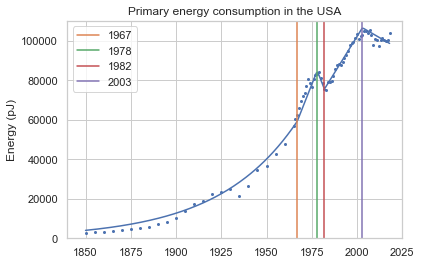

In [2]:
plt.scatter(year, 1055.06*energy, s=4)
r_0, y0_0 = reg.expReg(year, energy)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0_0, 0.02298961724912632,2.2 , -2.2, 1.4, -0.5, 1967,1978, 1982, 2003
plt.plot(yplot,1055.06* reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 110000], label=str(x1))
plt.plot([x2, x2], [0, 110000], label=str(x2))
plt.plot([x3, x3], [0, 110000], label=str(x3))
plt.plot([x4, x4], [0, 110000], label=str(x4))
plt.legend()
plt.title("Primary energy consumption in the USA")
plt.ylabel("Energy (pJ)")
plt.xlim(1840, 2025)
plt.ylim(0,110000)
ypred = 1055.06* reg.expllll(year, y0, r, a,c,e,g,x1,x2,x3,x4)
US_table['Energy(PJ)-Time(Year)'] = ypred

Text(0, 0.5, 'Quadrillion BTU')

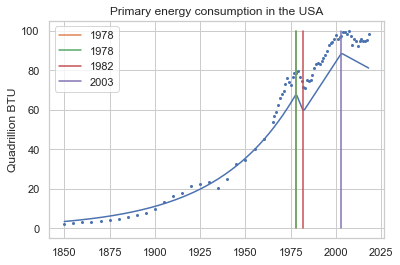

In [3]:
plt.scatter(year, energy, s=4)
r_0, y0_0 = reg.expReg(year, energy)
y0, r, a,c,e,g,x1,x2,x3,x4 = 0.800551090995104953*10**-18, 0.02319961724912632,2.2 , -2.2, 1.4, -0.5, 1978,1978, 1982, 2003
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 100], label=str(x1))
plt.plot([x2, x2], [0, 100], label=str(x2))
plt.plot([x3, x3], [0, 100], label=str(x3))
plt.plot([x4, x4], [0, 100], label=str(x4))
plt.legend()
plt.title("Primary energy consumption in the USA")
plt.ylabel("Quadrillion BTU")

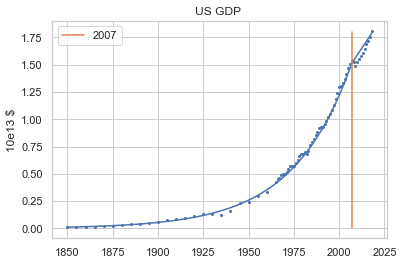

In [4]:
r, y0 = reg.expReg(year, gdp/10**13)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0, r, 0.025, 0.01,1,1, 2007, 2025,2200,2300
plt.scatter(year, gdp/10**13, s=4)
#plt.plot(yplot, reg.exp_fun(yplot, y0=y0, r=r))
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0,1.8], label=str(x1))
plt.legend()
plt.title("US GDP ")
plt.ylabel("10e13 $")
ypred= reg.expllll(year, y0, r, a,c,e,g,x1,x2,x3,x4)*(10**13)
US_table['GDP(2011$)-Time(year)'] = ypred

(0.5707085100288, 0.0074295839029999994, 9.999725341796875, 0.0008737725419578179, 0.001394637013871107, 4.95222227895061e-05)


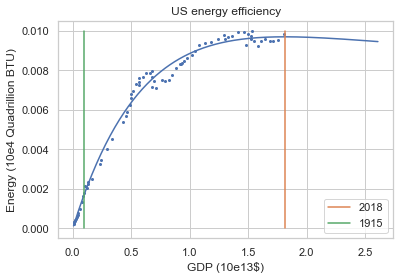

In [5]:
g = gdp/10**13
e = energy/ 10**4
gplot = np.linspace(g.min(), g.max()+0.8, 200)
plt.scatter(g,e, s= 4)
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e)
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.01], label = str(year_max)) 
inf_dist = np.array([abs(g[i]-0.1) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.1, 0.1],[0.0, 0.01], label = str(year_infl))
plt.legend()
plt.title('US energy efficiency')
plt.ylabel("Energy (10e4 Quadrillion BTU)")
plt.xlabel("GDP (10e13$)")
ypred= reg.s_model(g,G_i, E_i, A, a1, a2, a3 )*(10**4)*1055.06
US_table['Energy(PJ)-GDP(10e13$)']=ypred

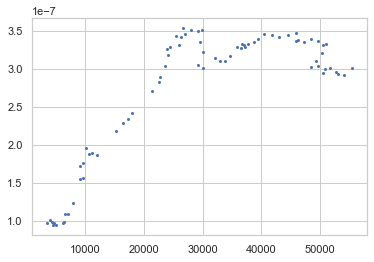

In [6]:
plt.scatter(gdp/population, energy/population, s=4)

(0.1114977, 1.8900249042152062e-07, 9.999725341796875, 3.775511875811102e-08, 1.2069487612738995e-07, 1.4361655896880094e-07)


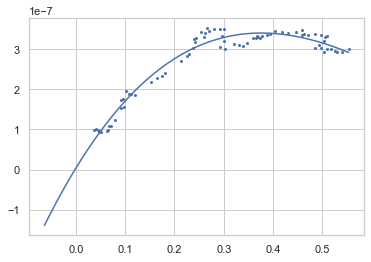

In [7]:
G = gdp/population/10**5
E = energy/population
plt.scatter(G, E, s=4)
G_i, E_i, A, a1, a2, a3 = reg.sReg(G, E)
Gplot = np.linspace(G.min()-0.1, G.max(), 200)
plt.plot(Gplot, reg.s_model(Gplot,G_i, E_i, A, a1, a2, a3))

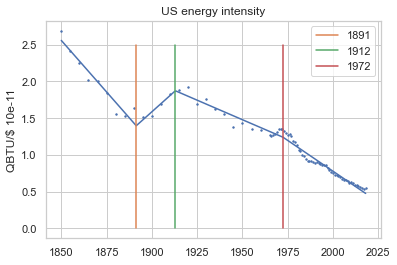

In [8]:
plt.scatter(year, energy/gdp*10**11, s=2)
a,b, c, e, g, x1, x2, x3 = -0.2, 2, 0.2, -0.2, -1, 1880, 1915, 1960
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**11, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2, 2200] )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1, x1], [0, 2.5], label = str(int(x1)))
plt.plot([x2, x2], [0, 2.5], label = str(int(x2)))
plt.plot([x3, x3], [0, 2.5], label = str(int(x3)))
plt.ylabel("QBTU/$ 10e-11")
plt.title("US energy intensity")
plt.legend()
ypred= 1055.06*reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-11)
US_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), USA')

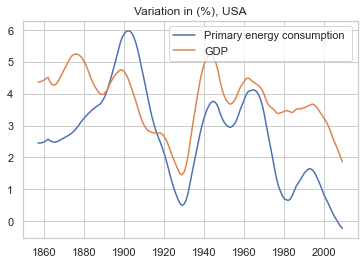

In [9]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), USA")


In [10]:
US_table = US_table.rename(columns={'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })

In [11]:
US_table.to_csv('../BDD/USA.csv', index=False)